# RED_WINE QUALITY PREDICTION

In [1]:
!pip install xgboost



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('winequality-red.csv')

In [3]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
#Checking the look and feel of dataset
df.sample(5)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
536            9.9              0.63         0.24             2.4      0.077   
478            9.6              0.68         0.24             2.2      0.087   
469            8.7              0.82         0.02             1.2      0.070   
594            7.9              0.72         0.17             2.6      0.096   
688            7.7              0.66         0.04             1.6      0.039   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
536                  6.0                  33.0   0.9974  3.09       0.57   
478                  5.0                  28.0   0.9988  3.14       0.60   
469                 36.0                  48.0   0.9952  3.20       0.58   
594                 20.0                  38.0   0.9978  3.40       0.53   
688                  4.0                   9.0   0.9962  3.40       0.47   

     alcohol  quality  
536      9.4        5  
478     10.2        5  
469      9.8        5  
594      9.5        5  
688      9.4        5

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [7]:
#checking the unique label values
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

As we can see, the quality ranges from 03 to 08 with 03 being the lowest and 08 being the highest

As suggested in the problem discription, converting the labels into only two variables. Reference text (What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.)

In [8]:
df.loc[df.quality >= 7, 'quality'] = 1

In [9]:
#checking the unique label values
df.quality.unique()

array([5, 6, 1, 4, 3], dtype=int64)

In [10]:
df.loc[df.quality > 1, 'quality'] = 0


In [11]:
#checking the unique label values
df.quality.unique()

array([0, 1], dtype=int64)

In [12]:
df.quality.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

There is an imbalance in the data w.r.t label

In [13]:
#checking the data shape
df.shape

(1599, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
#checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.describe().T 

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   0.135710   0.342587  0.00000   0.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                0.00000   0.000000    1.00000

1] no null values confimed
2] skewness observed in total sulfur dioxide, free sulfur dioxide
3] possibility of skewness


In [17]:
#describing the data visually
plt.figure (figsize = (10,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot = True, fmt = 'f',cmap='Blue')
plt.xticks(fontsize = 14)
plt.yticks (fontsize = 12)
plt.title ("Varriable Summary")
plt.show()

KeyError: "'Blue' is not a known colormap name"

<Figure size 1000x600 with 0 Axes>

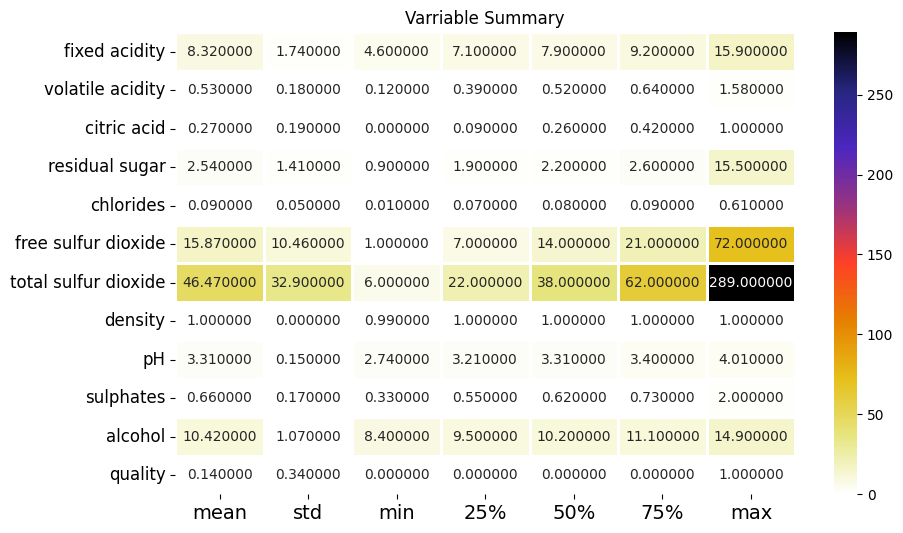

In [19]:
#describing the data visually
plt.figure (figsize = (10,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot = True, fmt = 'f',cmap='CMRmap_r')
plt.xticks(fontsize = 14)
plt.yticks (fontsize = 12)
plt.title ("Varriable Summary")
plt.show()

The data is not scaled, scaling will be required

In [20]:
#checking the corelation between the data

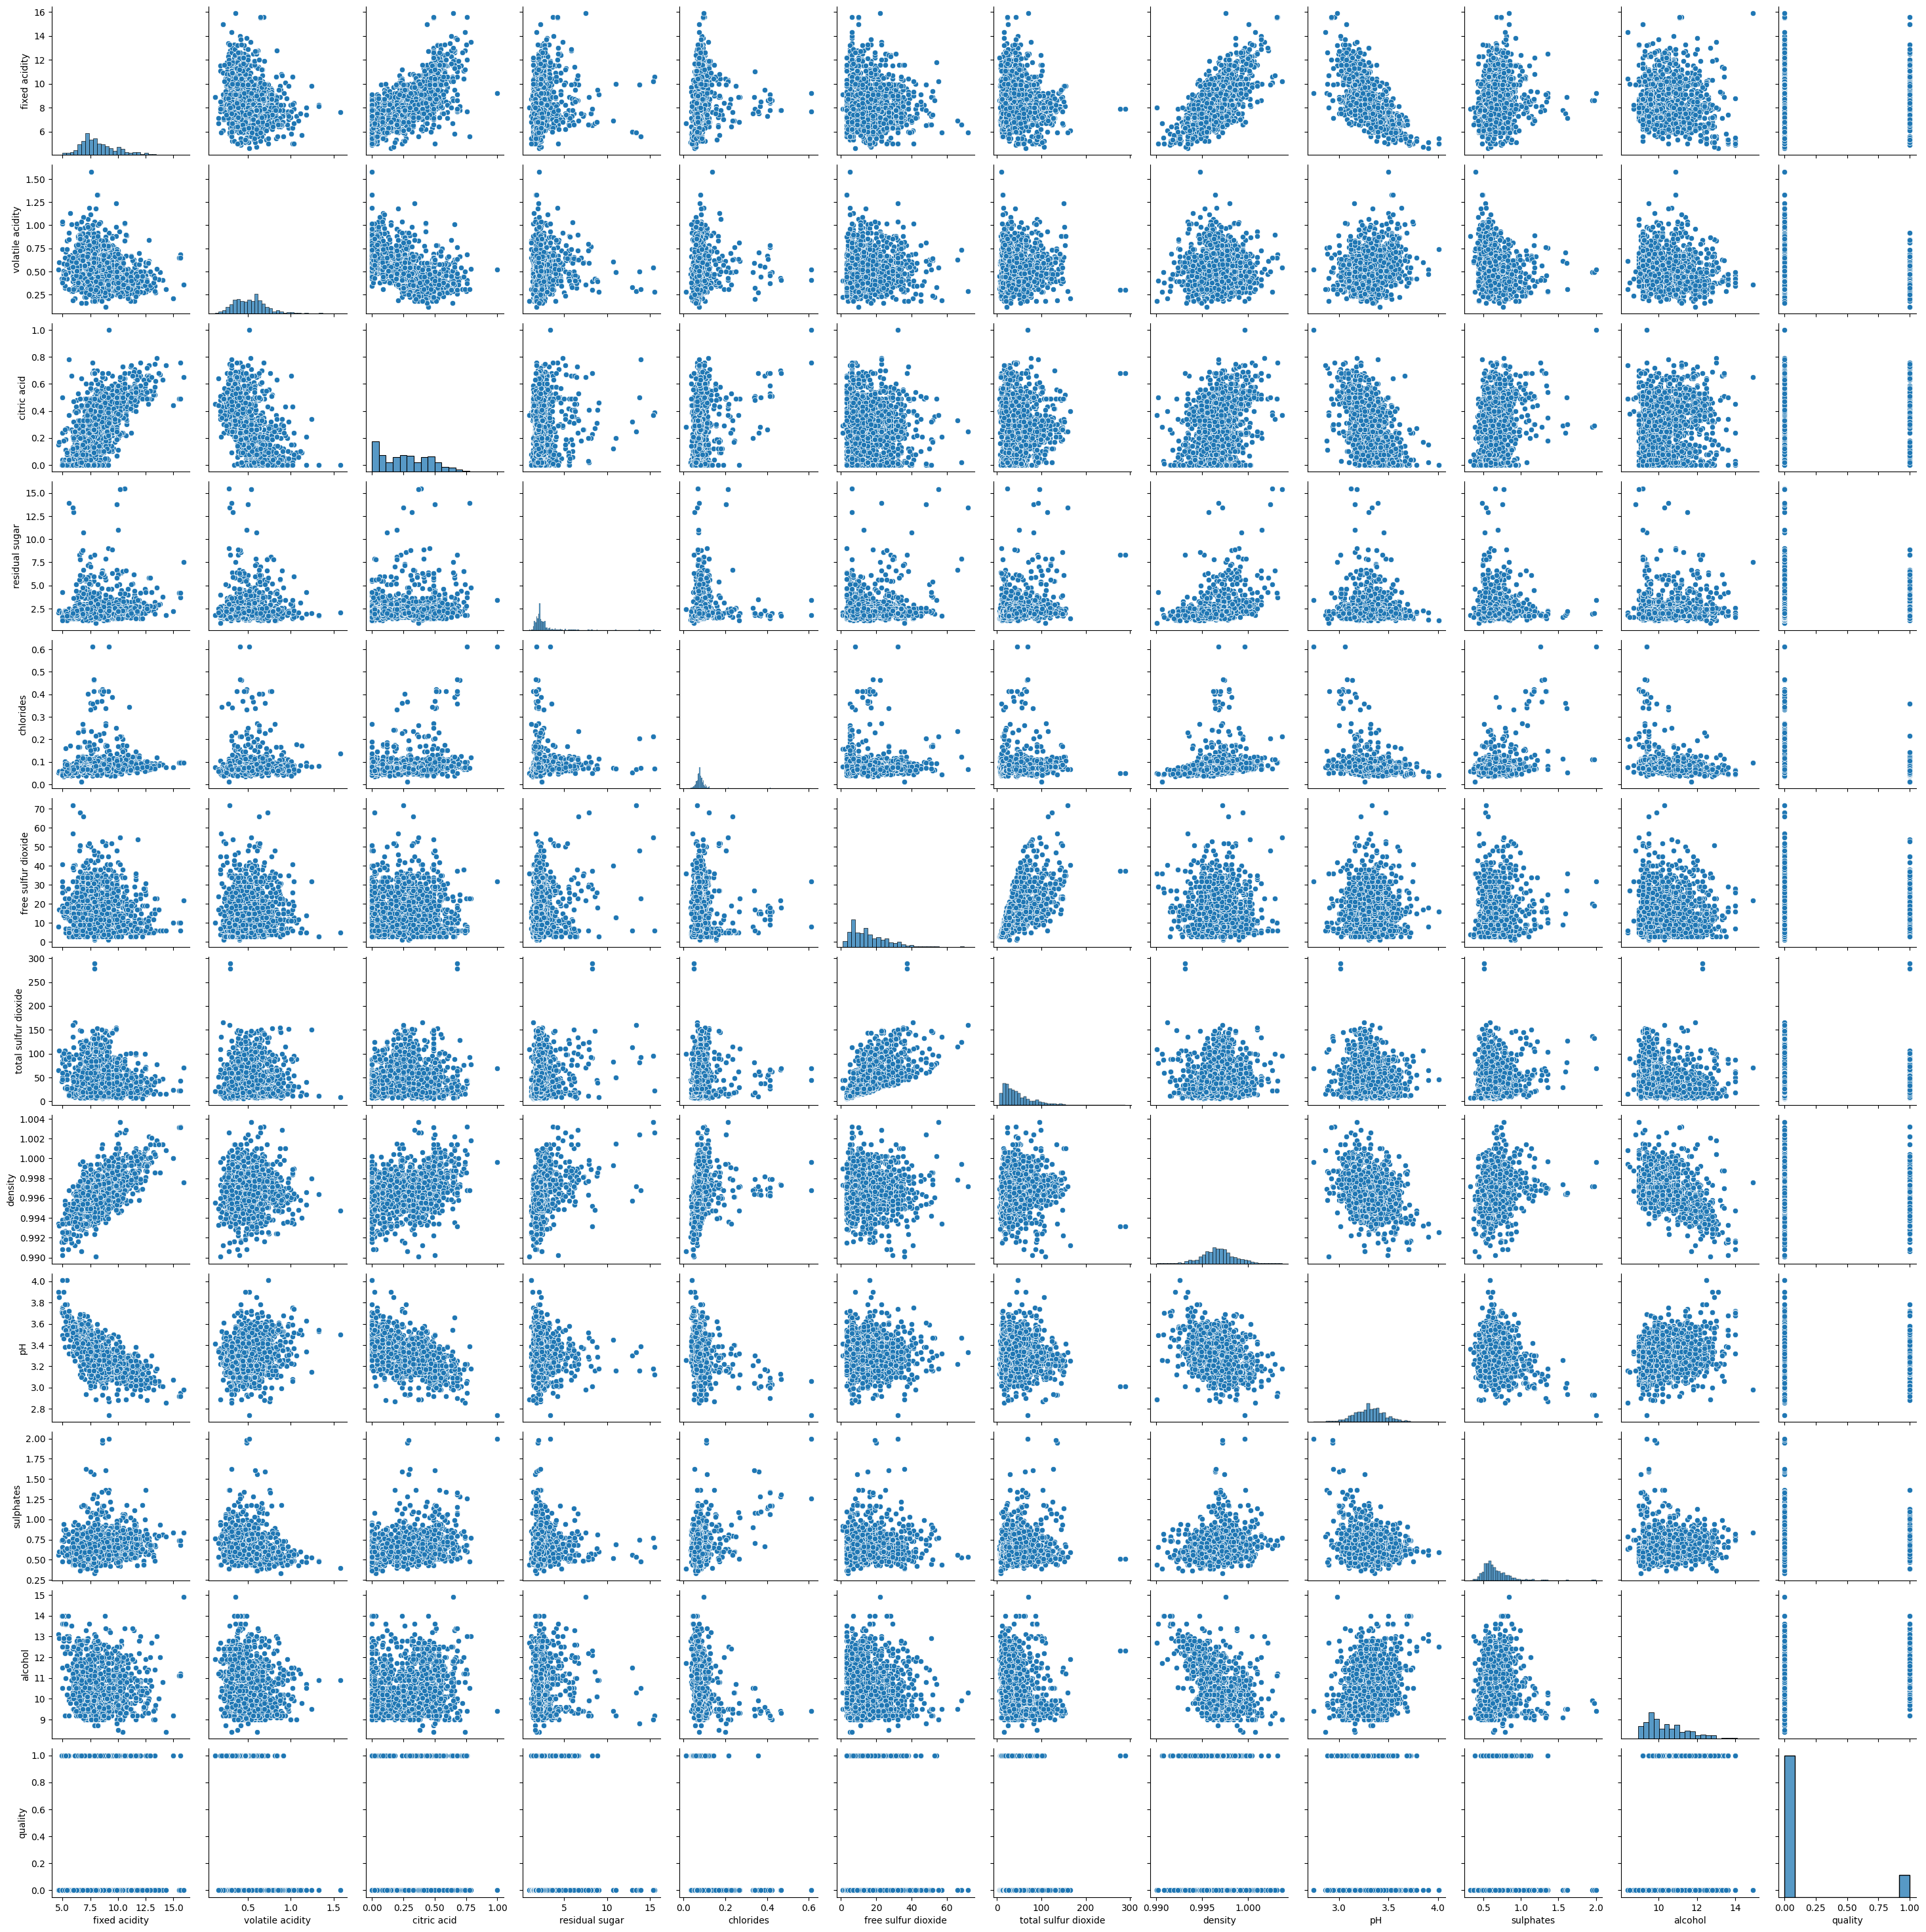

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot (df)
plt.savefig('pairplot.png')
plt.show()

1] Imbalance is observed in many features
2] Data is not normally distributed (to be confirmed further with more EDA teachniques)
3] Not all the features have equal co-relation with label

<Axes: xlabel='quality', ylabel='count'>

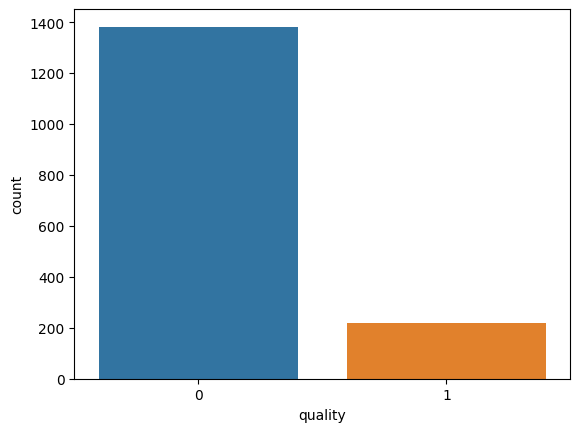

In [22]:
sns.countplot(x='quality', data = df)


In [23]:
#checking the corelation using heatmaps (only absolute values)

<Axes: >

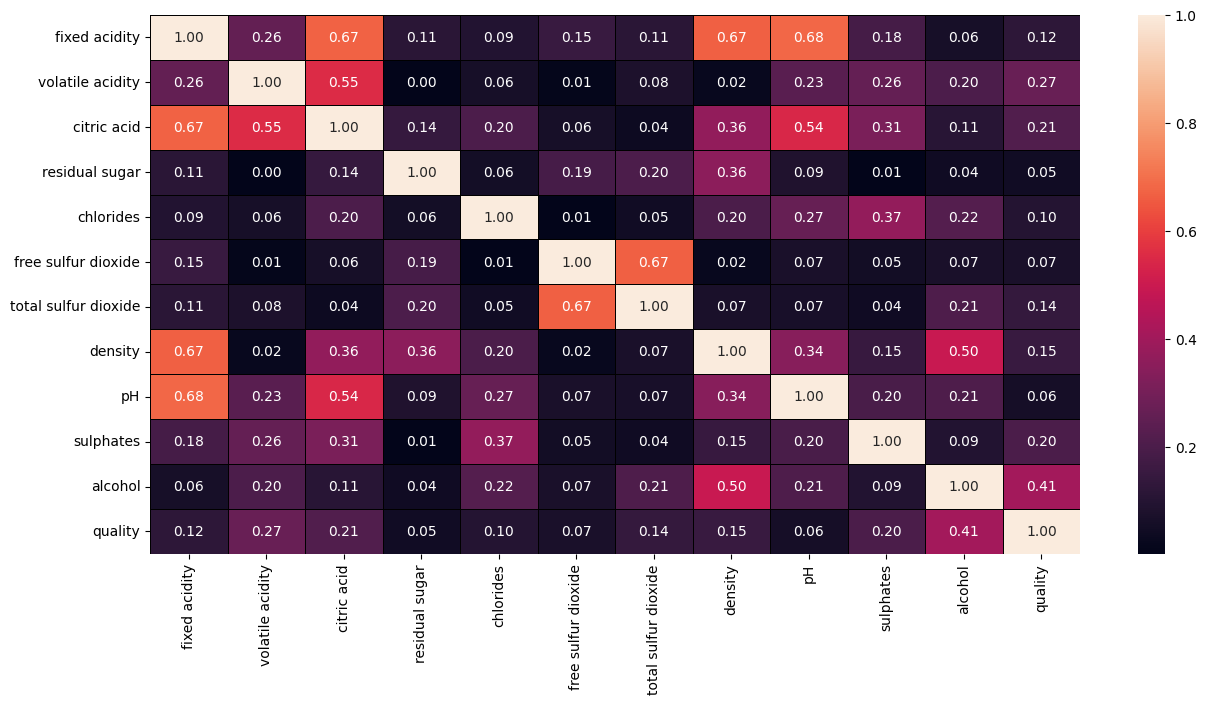

In [24]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f')

1] residual sugar, free sufur dioxide and ph have very low corelation with the label
2] alcohol, volatile acidity and citric acidicty have high corelation with label

In [25]:
df_corr = df.corr().abs()['quality'].sort_values() #checking the correlations with label in ascending order
df_corr


residual sugar          0.047779
pH                      0.057283
free sulfur dioxide     0.071747
chlorides               0.097308
fixed acidity           0.120061
total sulfur dioxide    0.139517
density                 0.150460
sulphates               0.199485
citric acid             0.214716
volatile acidity        0.270712
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

alcohol, volatile acidity, citric acid have great correlations with label

<bound method Axes.bar of <Axes: >>

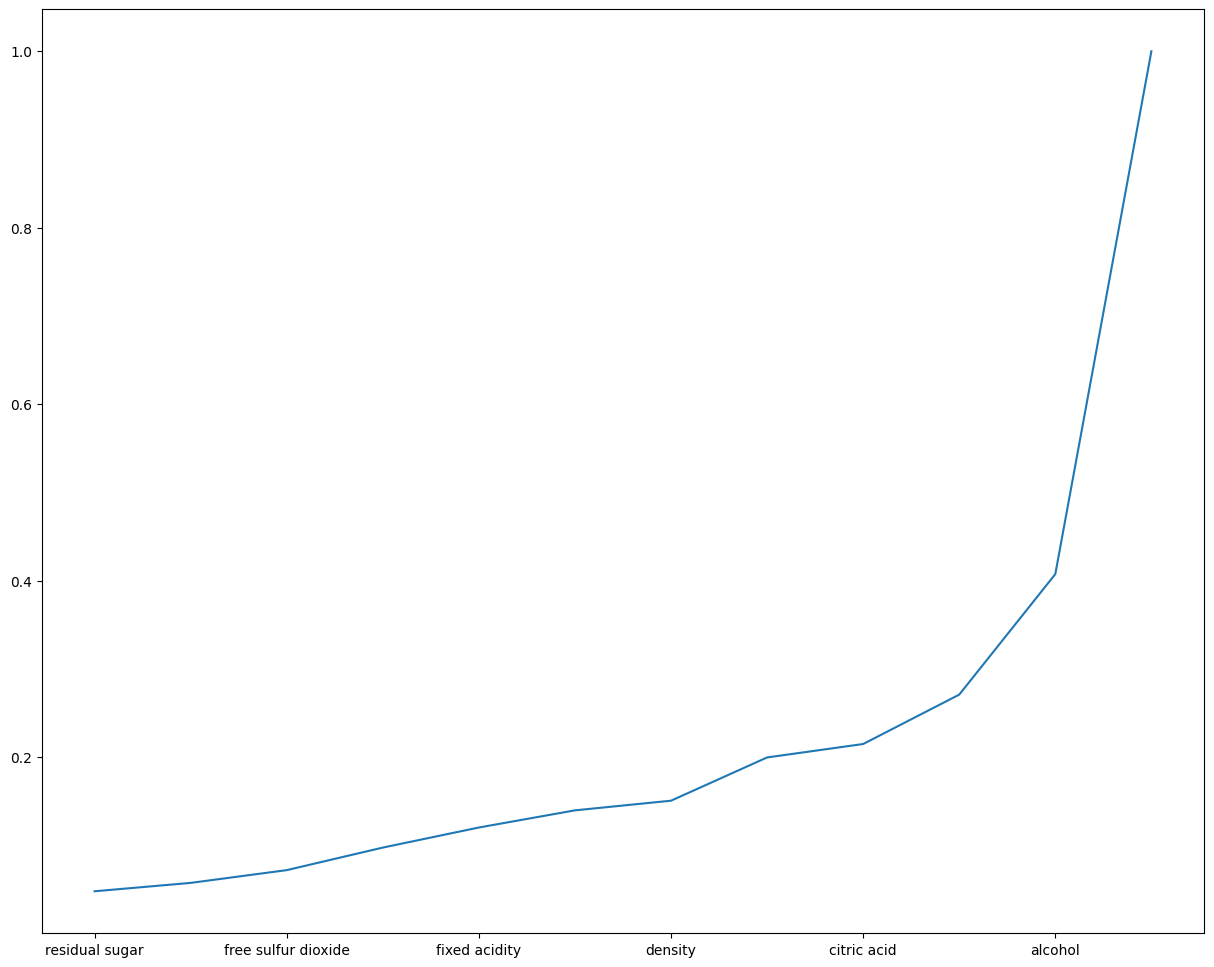

In [26]:
plt.figure (figsize = (15,12))
df_corr.plot().bar #graphichal representation of correlation with label

In [27]:
#Checking for data distribution

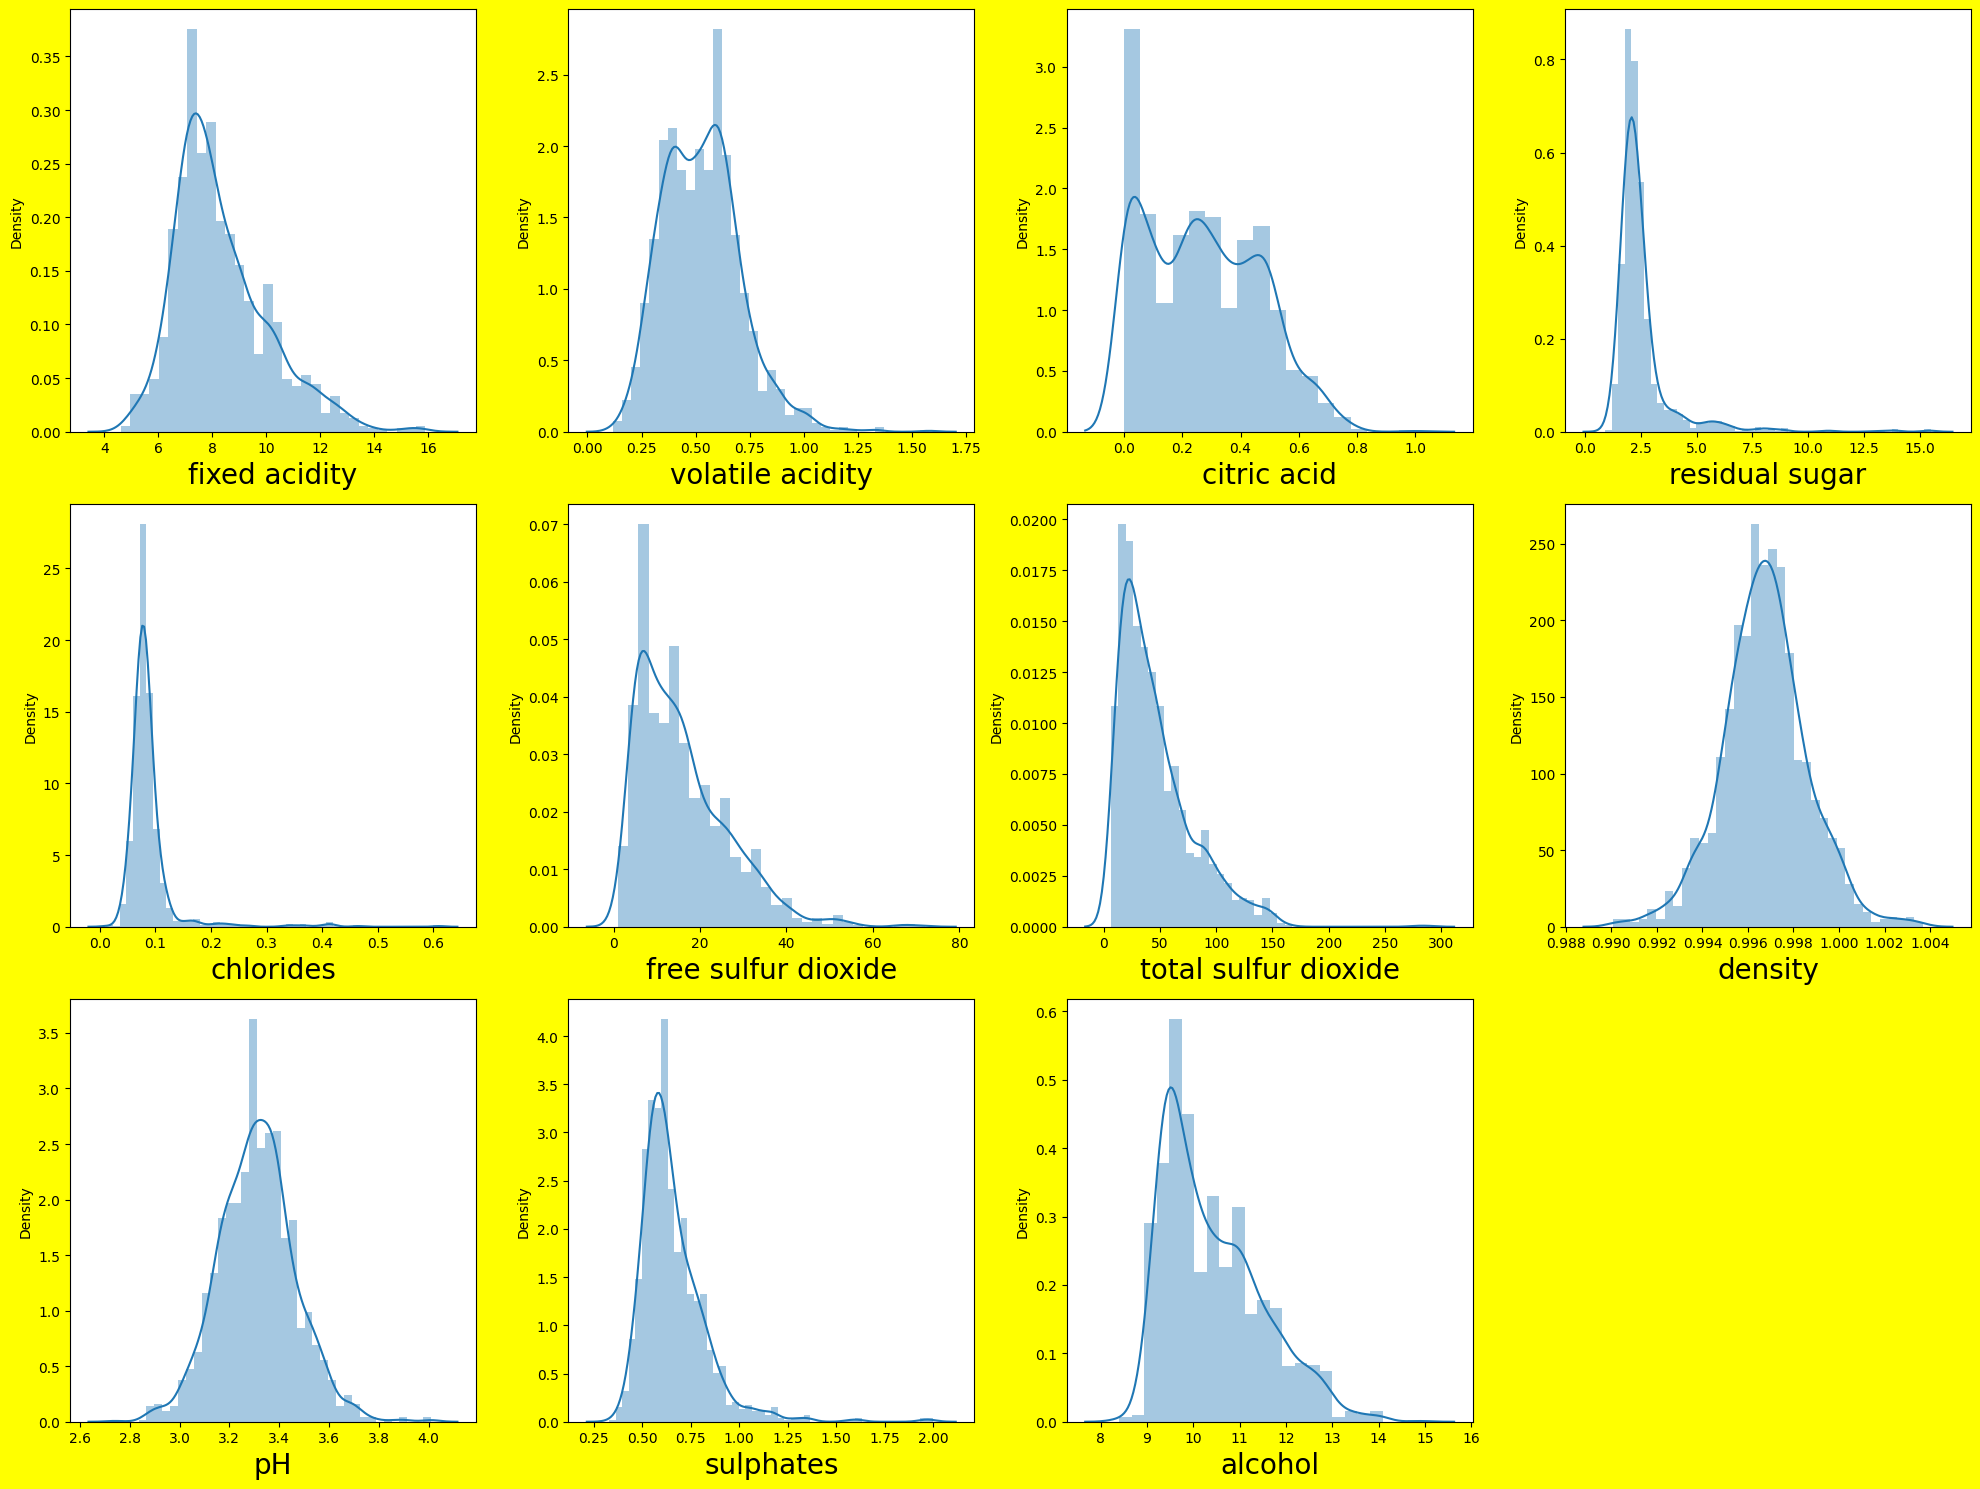

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <12: #here 8 is the number of features
        ax = plt.subplot (3,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

1] Most of the features have positive skewness
2] Some features are multimodal 

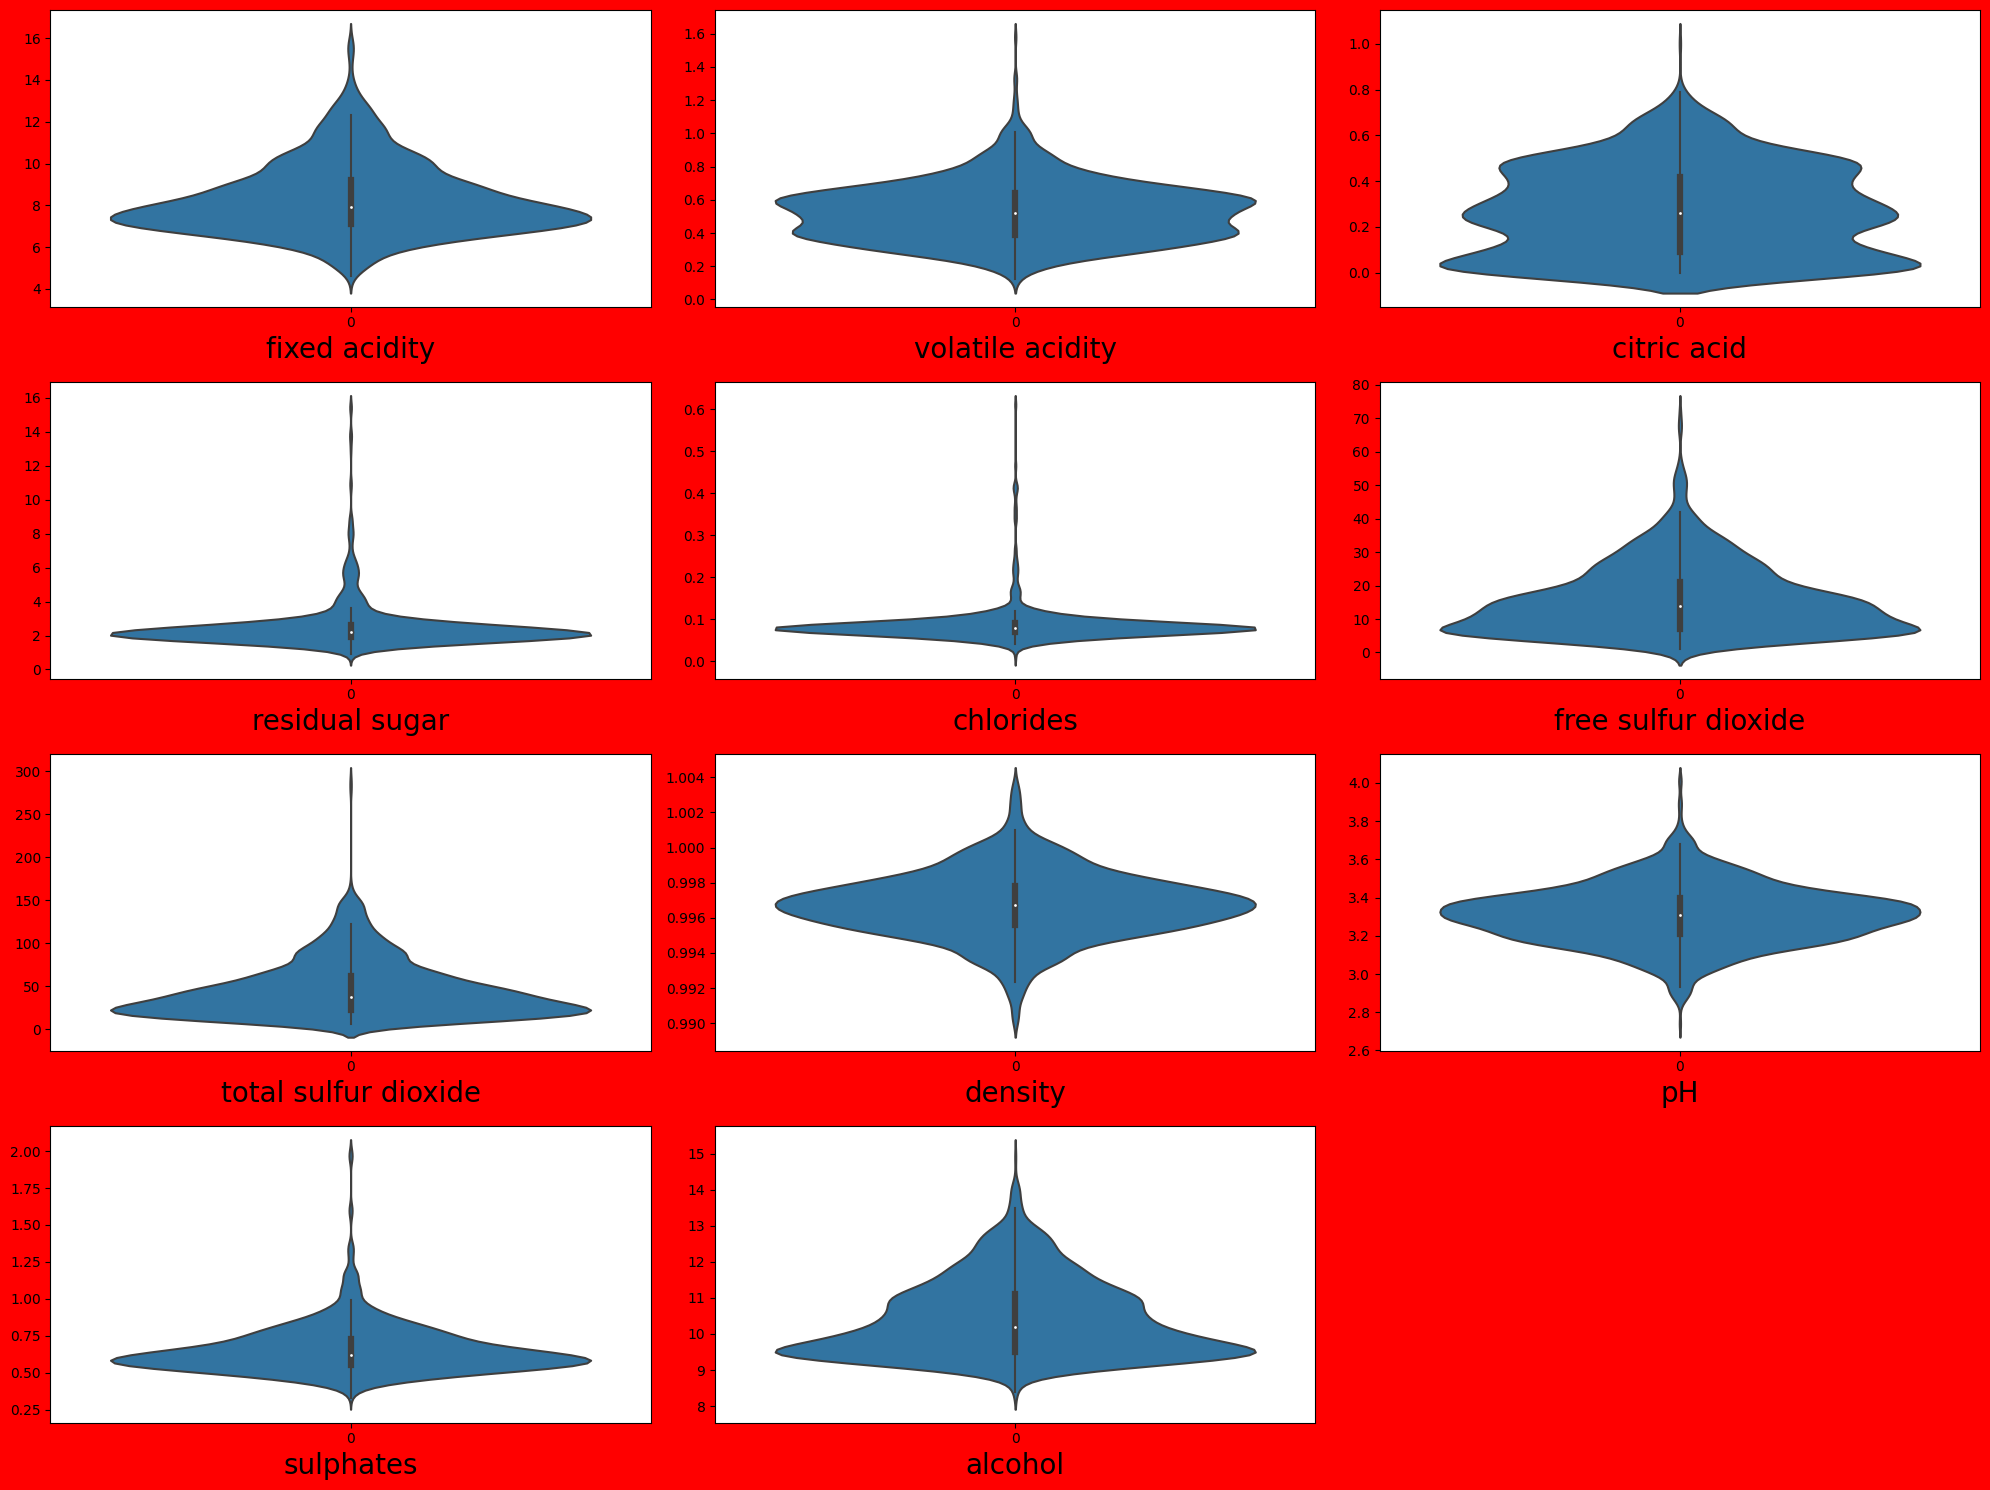

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15), facecolor = 'red')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <12: #here 12 is the number of features
        ax = plt.subplot (4,3, plotnumber)
        sns.violinplot (df[column], hue_order = "yellow")
        plt.xlabel (column, fontsize =20)
        plotnumber +=1
plt.tight_layout()

In [30]:
#Checking for outliers

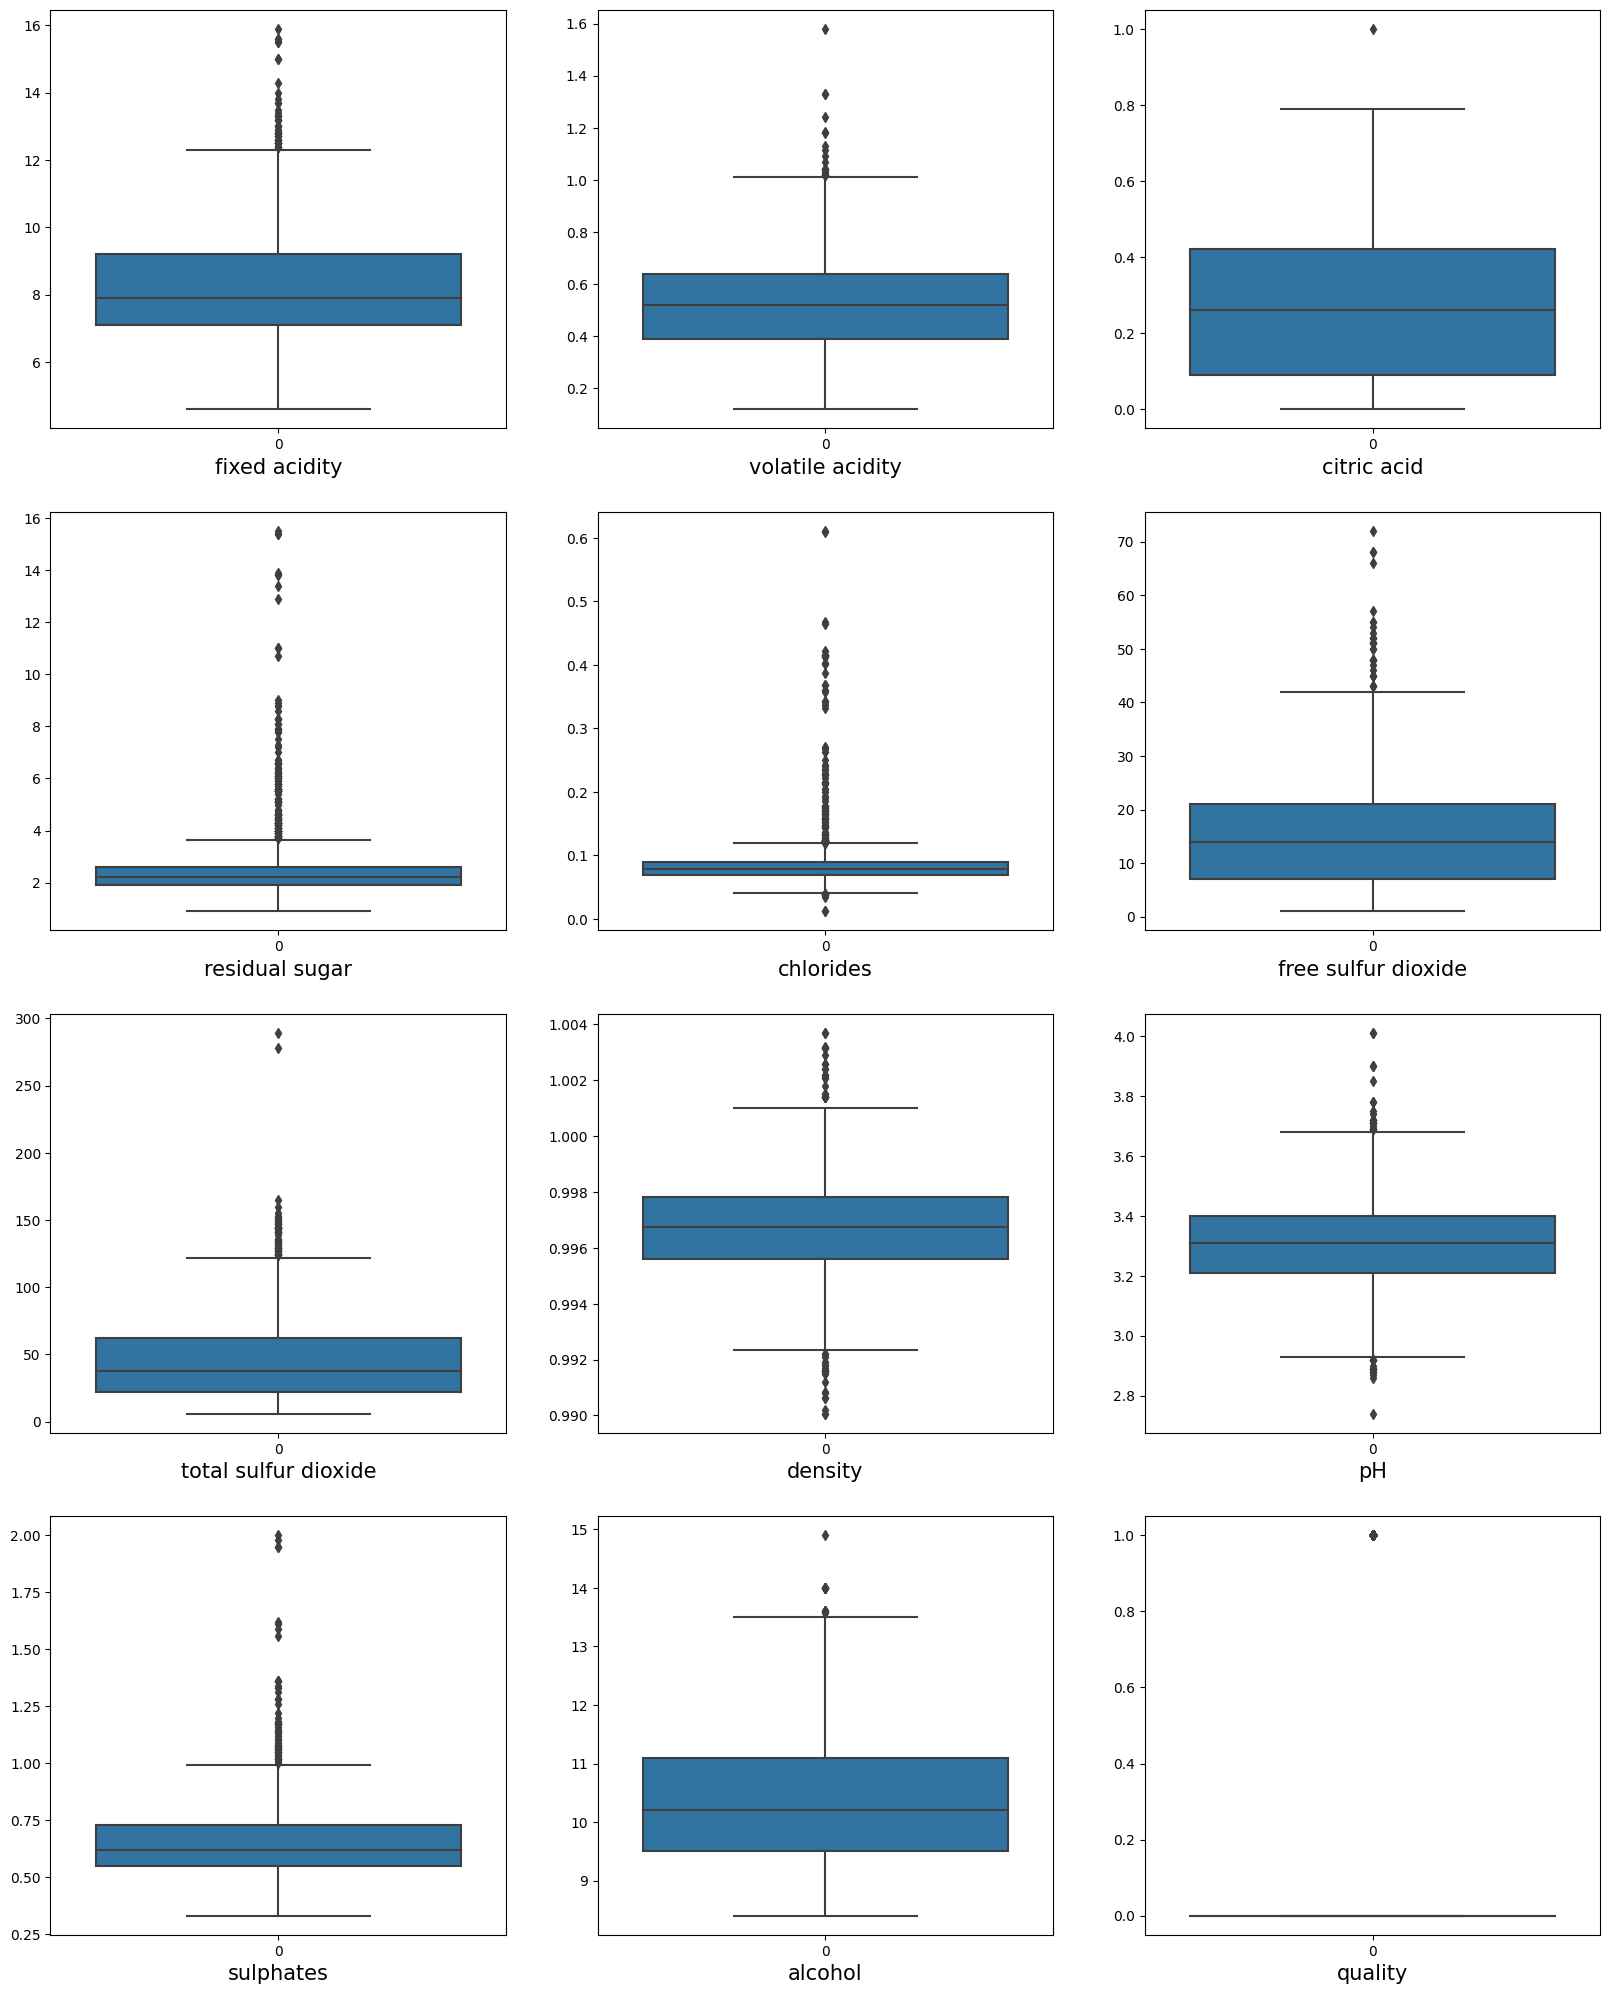

In [31]:
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=12: 
        plt.subplot (4,3, graph)
        ax = sns.boxplot (data = df[column],)
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
from scipy.stats import zscore

z_score = zscore (df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        0  
1596     11.0        0  
1597     10.2        0  
1598     11.0        0  

[1458 rows x 12 columns]

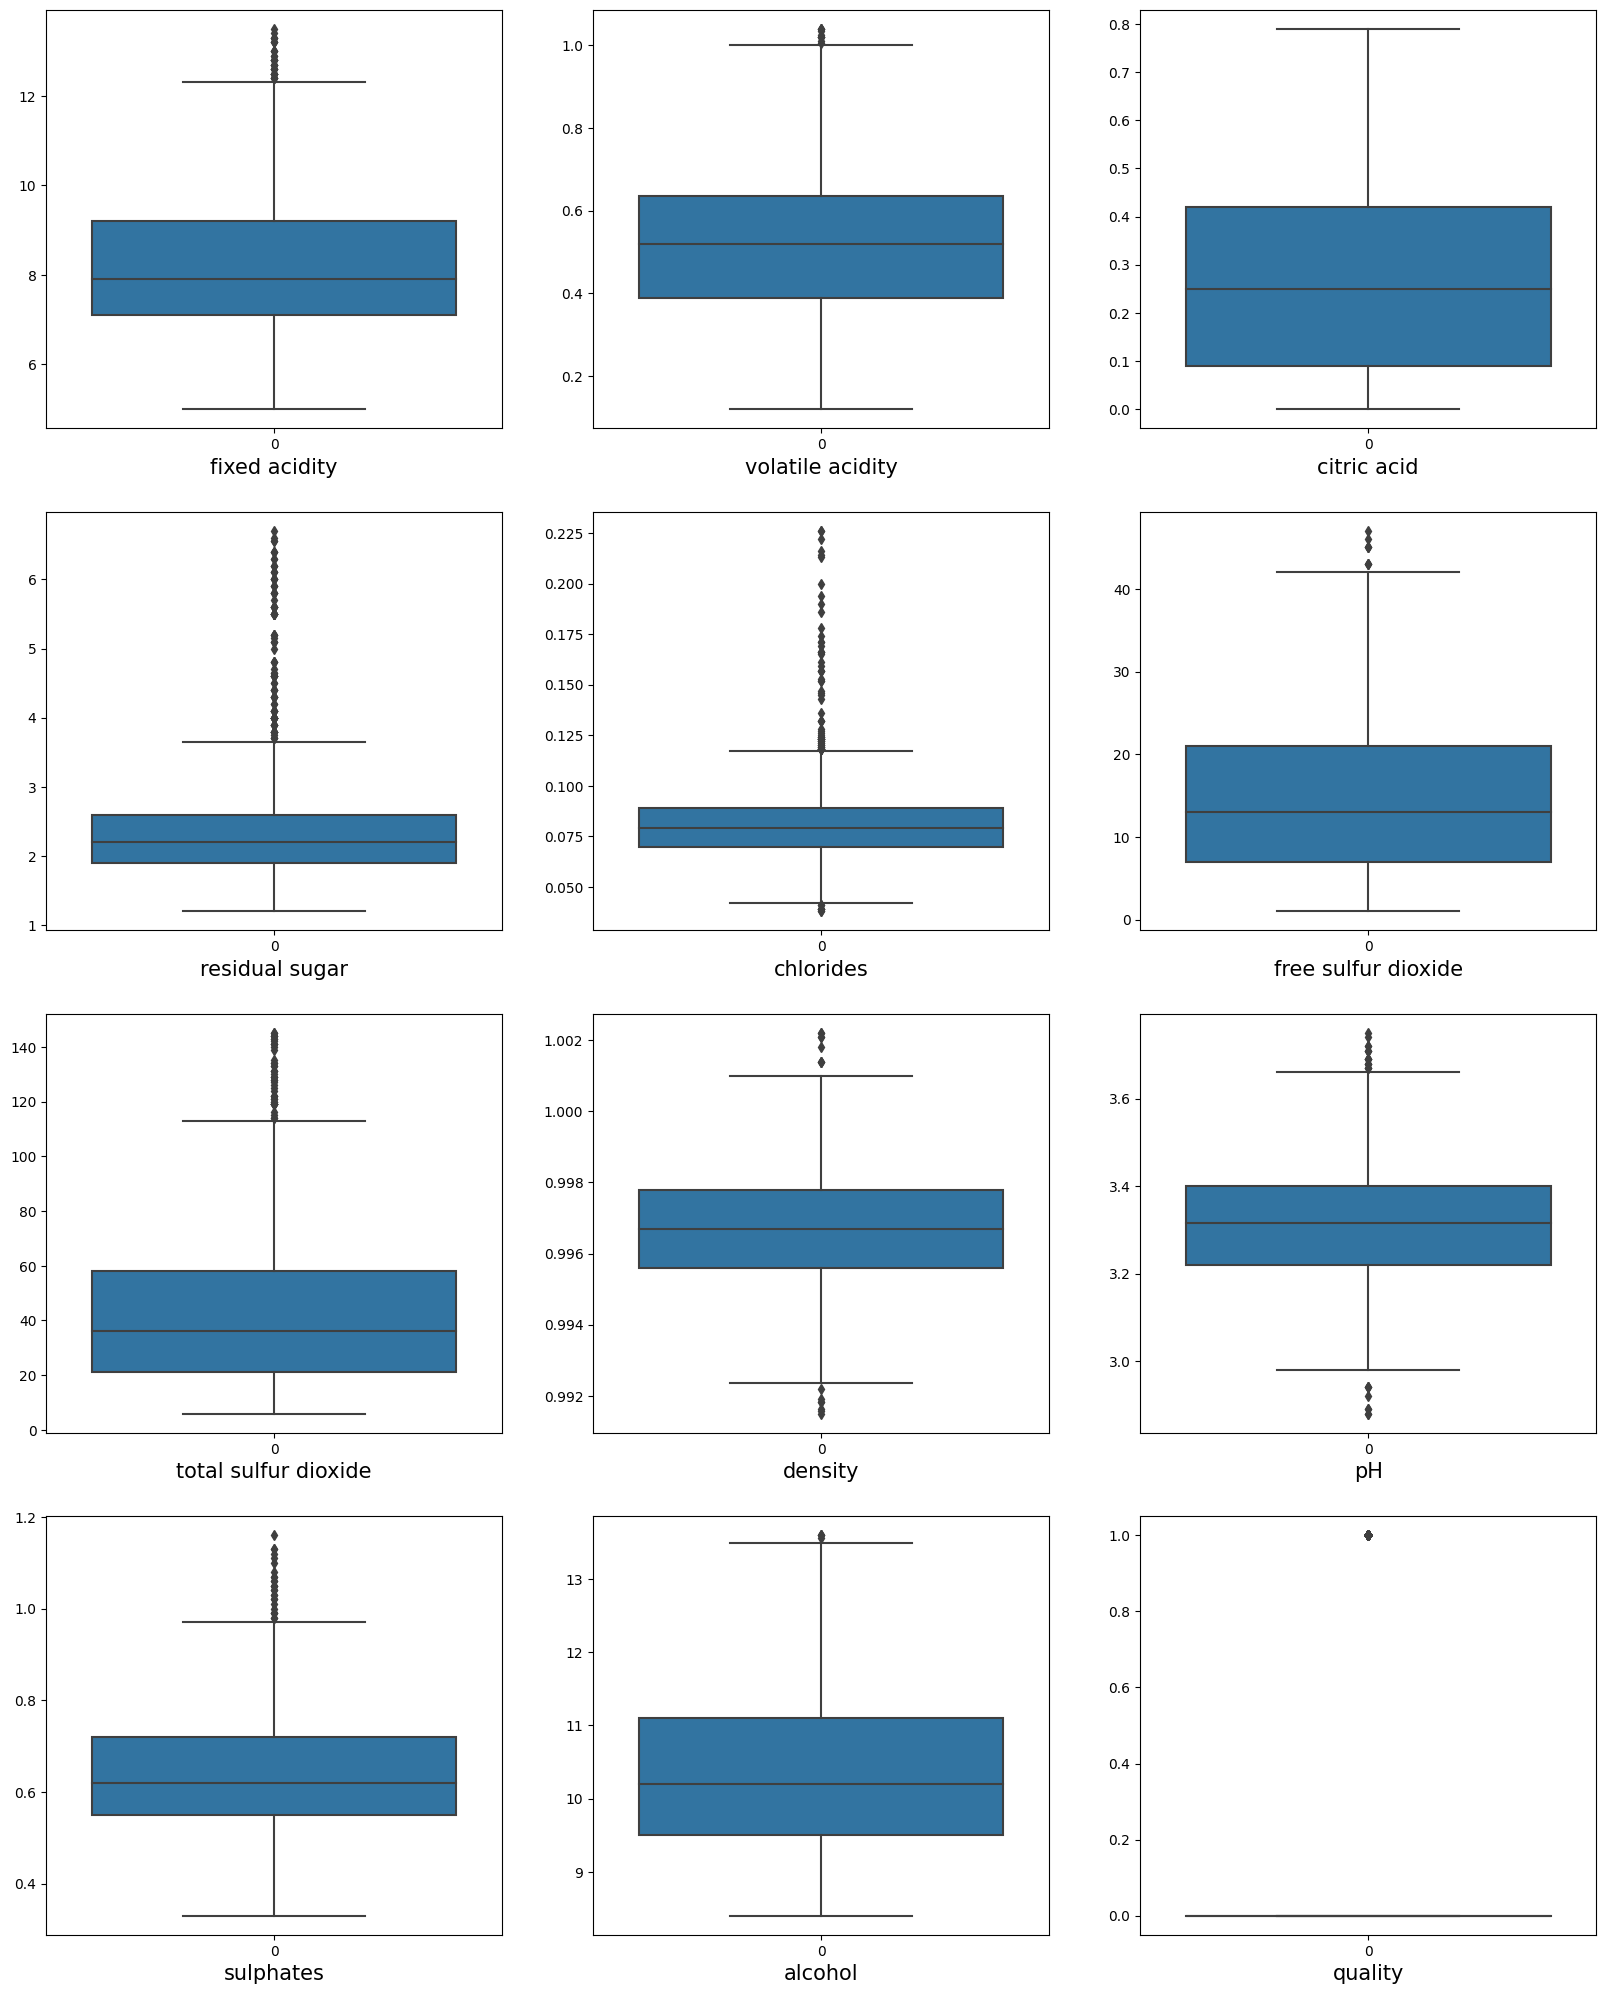

In [34]:
#Checking the boxplot again to check for outliers
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=12: 
        plt.subplot (4,3, graph)
        ax = sns.boxplot (data = df[column],)
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()


In [35]:
#Checking for Skewness
df.skew().sort_values()

density                 0.055543
pH                      0.113039
citric acid             0.292600
volatile acidity        0.392097
alcohol                 0.757396
fixed acidity           0.820879
free sulfur dioxide     0.869727
sulphates               0.893297
total sulfur dioxide    1.185230
quality                 2.103030
chlorides               2.307274
residual sugar          2.450707
dtype: float64

In [36]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
#splitting features & labels

In [38]:
x=df.drop('quality', axis=1)
y= df.quality

In [39]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [41]:
y.sample(5)

417     0
1080    0
1198    0
177     0
249     0
Name: quality, dtype: int64

In [42]:
#Using Quantile transformer for skewness removal

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
np_array = qt.fit_transform(x) #this will result in numpy array
np_array

array([[0.34334334, 0.86586587, 0.        , ..., 0.9039039 , 0.28578579,
        0.13963964],
       [0.46596597, 0.96996997, 0.        , ..., 0.20920921, 0.68368368,
        0.36186186],
       [0.46596597, 0.91641642, 0.16266266, ..., 0.34234234, 0.60810811,
        0.36186186],
       ...,
       [0.06406406, 0.48298298, 0.31581582, ..., 0.79029029, 0.8048048 ,
        0.72772773],
       [0.02452452, 0.77377377, 0.3013013 , ..., 0.95745746, 0.73923924,
        0.50950951],
       [0.03103103, 0.0955956 , 0.81731732, ..., 0.71571572, 0.63563564,
        0.72772773]])

In [43]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [44]:
#converting array into dataframe
xt = pd.DataFrame(np_array, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [45]:
xt.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.343343          0.865866     0.000000        0.251251   0.406406   
1       0.465966          0.969970     0.000000        0.769269   0.869870   
2       0.465966          0.916416     0.162663        0.595596   0.798298   
3       0.925926          0.058559     0.933934        0.251251   0.374374   
4       0.343343          0.865866     0.000000        0.251251   0.406406   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.408408              0.472472  0.752252  0.903904   0.285786   
1             0.833834              0.811812  0.524024  0.209209   0.683684   
2             0.573073              0.720721  0.575576  0.342342   0.608108   
3             0.654154              0.764264  0.788288  0.135135   0.363363   
4             0.408408              0.472472  0.752252  0.903904   0.285786   

    alcohol  
0  0.139640  
1  0.361862  
2  0.361862  
3  0.361862  
4  0.139640

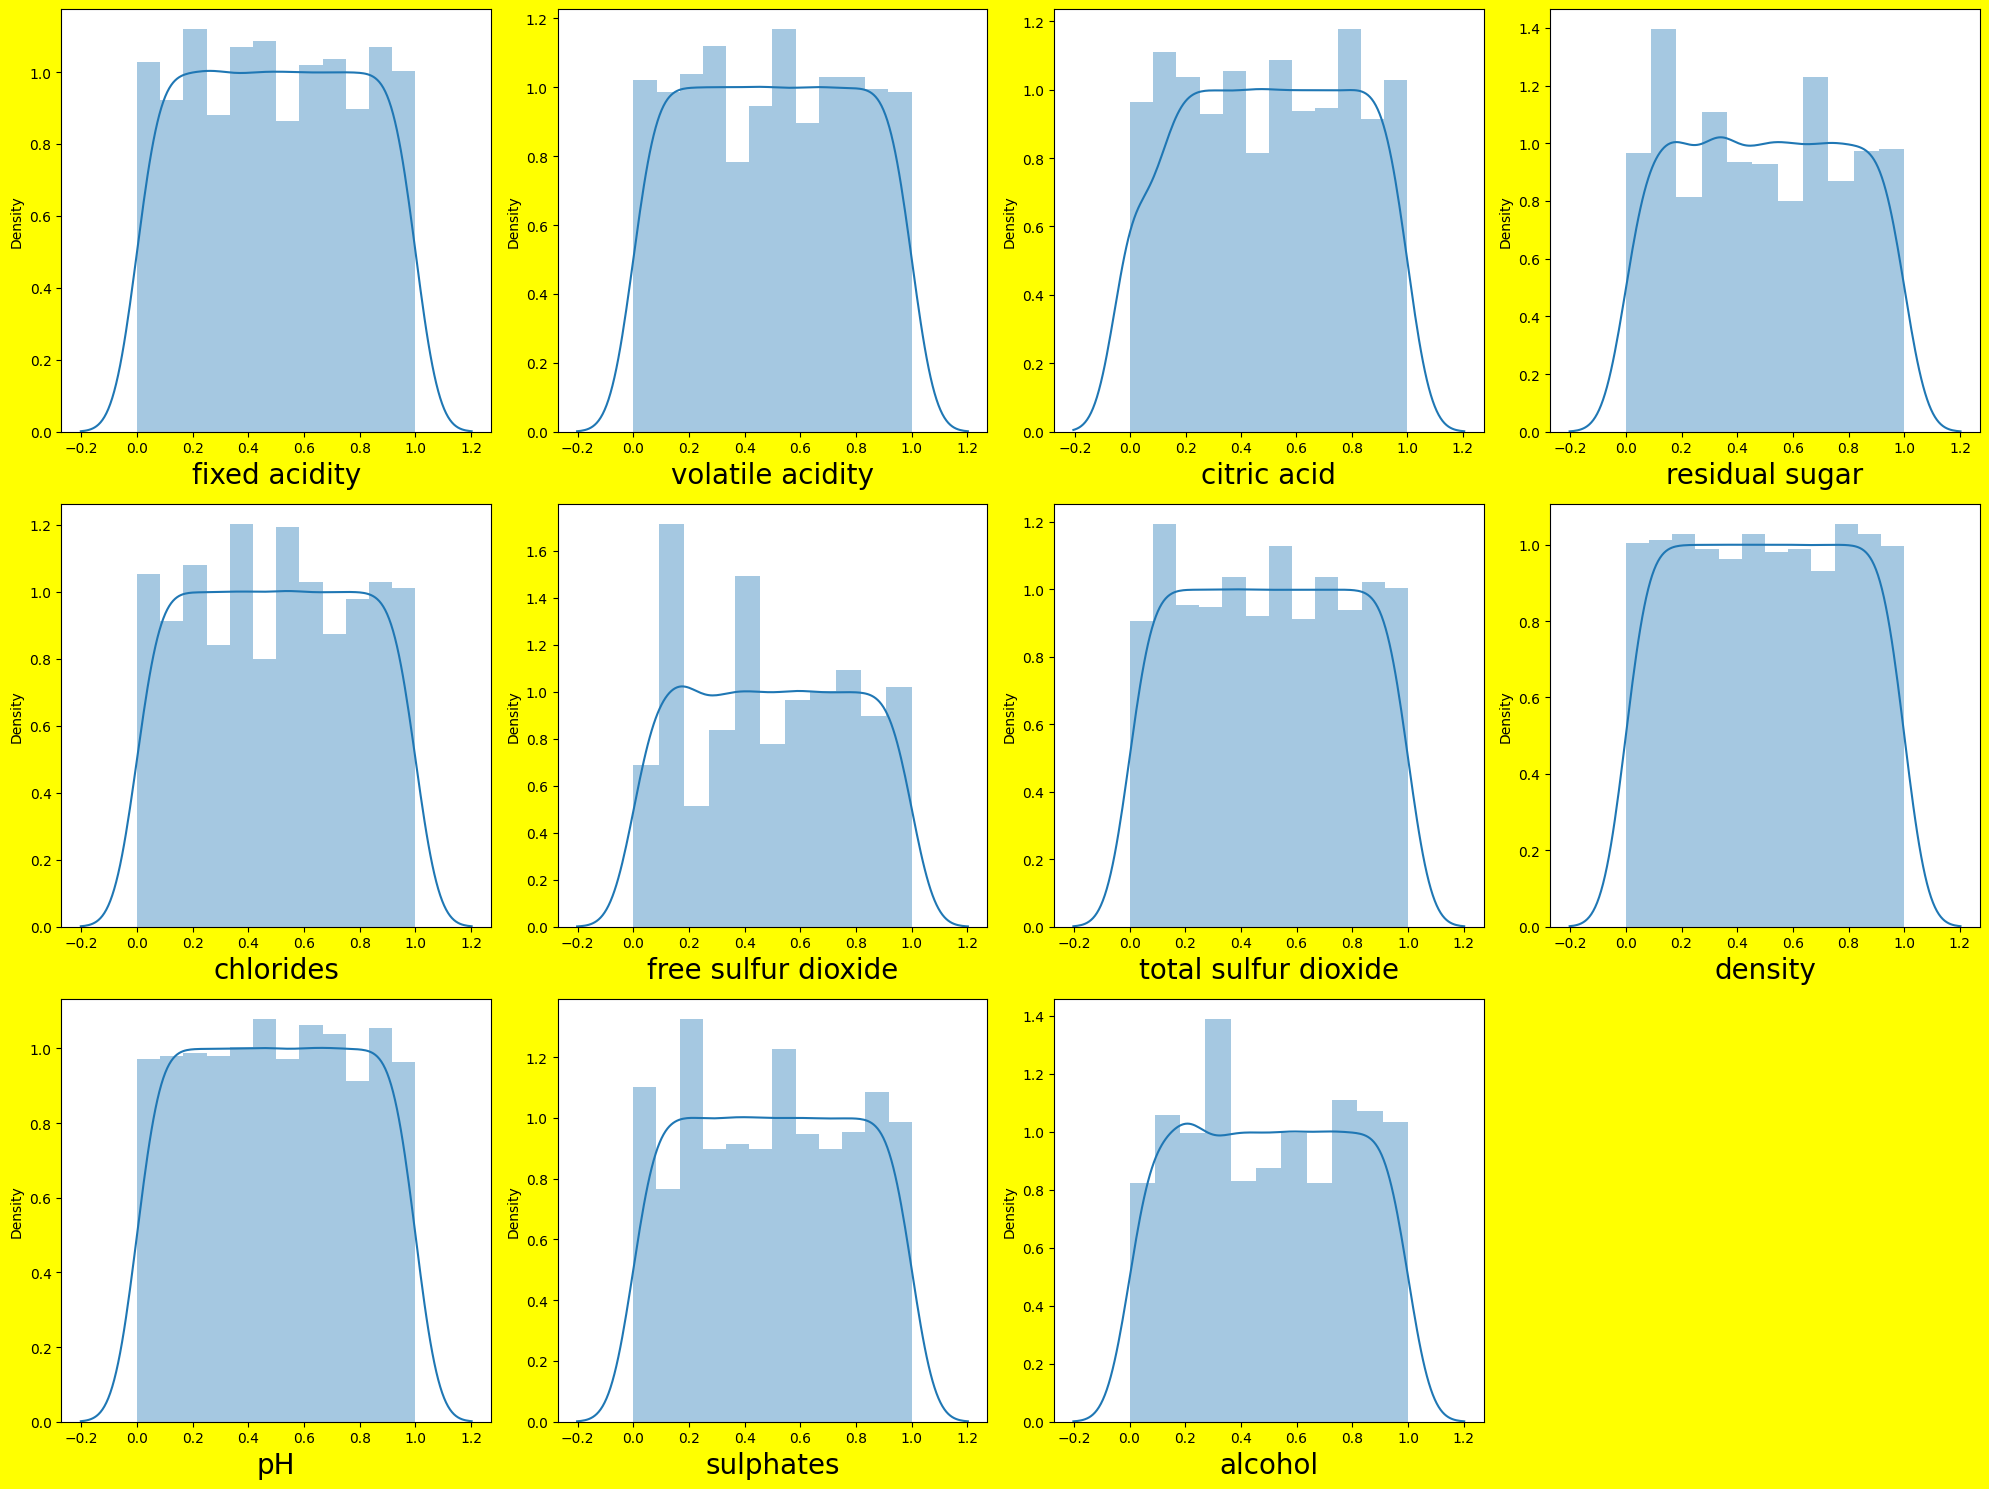

In [46]:
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in xt:
    if plotnumber <12: #here 8 is the number of features
        ax = plt.subplot (3,4, plotnumber)
        sns.distplot (xt [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

<Axes: ylabel='count'>

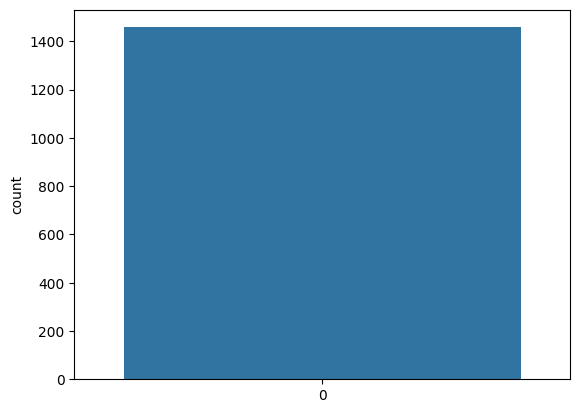

In [47]:
sns.countplot(y)

In [48]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
from sklearn.metrics import r2_score


In [49]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split (xt, y, test_size = 0.2, random_state = i)
    lr.fit (x_train, y_train)
    pred_train = lr.predict (x_train)
    pred_test = lr.predict (x_test)
    print (f"At random state {i}, the training accuracy is: {r2_score (y_train, pred_train)}")
    print (f"At random state {i}, the testing accuracy is: {r2_score (y_test, pred_test)}")
    print ('\n')

At random state 0, the training accuracy is: 0.2561739076356262
At random state 0, the testing accuracy is: 0.2478448934959725


At random state 1, the training accuracy is: 0.26444394164520013
At random state 1, the testing accuracy is: 0.21323210081113975


At random state 2, the training accuracy is: 0.25064241037033586
At random state 2, the testing accuracy is: 0.26233630544654973


At random state 3, the training accuracy is: 0.2623210949727146
At random state 3, the testing accuracy is: 0.223125861453502


At random state 4, the training accuracy is: 0.2569573640930791
At random state 4, the testing accuracy is: 0.237422018793785


At random state 5, the training accuracy is: 0.2669879330502608
At random state 5, the testing accuracy is: 0.19471698057040565


At random state 6, the training accuracy is: 0.26161965478846394
At random state 6, the testing accuracy is: 0.21611682377715968


At random state 7, the training accuracy is: 0.25876155202423545
At random state 7, the test

In [50]:
x_train, x_test, y_train, y_test = train_test_split (xt, y, test_size = 0.2, random_state = 11)

In [51]:
import six
import joblib
import sys
sys.modules ['sklearn.externals.six'] = six
sys.modules ['sklearn.externals.joblib'] = joblib

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
from sklearn.preprocessing import StandardScaler
#Now, let us start by scaling the data and normalizing it to a particular range of values
std_scale = StandardScaler()
xtrain = std_scale.fit_transform(x_train)
xtest = std_scale.transform(x_test)

In [54]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE without specifying a ratio
ovr_spl = SMOTE(random_state=42)

# Use SMOTE to oversample the minority class to achieve a balanced dataset
x_train_ns, y_train_ns = ovr_spl.fit_resample(x_train, y_train)

In [55]:
import warnings
warnings.filterwarnings('ignore')

# USING XGB CLASSIFIER


In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train_ns, y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [57]:
y_pred = model.predict(x_test)

In [58]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [59]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9006849315068494

# Using KNNClassifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()


In [61]:
knn.fit(x_train_ns, y_train_ns)
y_pred = knn.predict (x_test)


In [62]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7773972602739726

# Using Decision Tree Classifier# 

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_ns, y_train_ns)
y_pred = dtc.predict (x_test)


In [65]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8493150684931506

# Using SVM

In [66]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_ns, y_train_ns)
y_pred = svc.predict (x_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.815068493150685

# Using Adaboost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [69]:
ada.fit(x_train_ns, y_train_ns)
y_pred = ada.predict (x_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8082191780821918

# Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV, KFold

In [72]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [73]:
from sklearn.model_selection import GridSearchCV, KFold  # Import KFold here
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE without specifying a ratio
ovr_spl = SMOTE(0.75)

# Use SMOTE to oversample the minority class to achieve a balanced dataset
x_train_ns, y_train_ns = ovr_spl.fit_resample(x_train, y_train)

from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE with the desired ratio as a keyword argument
ovr_spl = SMOTE(sampling_strategy=0.75)

# Use SMOTE to oversample the minority class to achieve a balanced dataset
x_train_ns, y_train_ns = ovr_spl.fit_resample(x_train, y_train)


# Define the hyperparameter values to search over
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

# Create the GridSearchCV object
gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))

# Fit the grid search to your data
gs2.fit(x_train_ns, y_train_ns)

# Print the best score and best parameters
print('Best score:', gs2.best_score_)
print('Best parameters:', gs2.best_params_)


TypeError: SMOTE.__init__() takes 1 positional argument but 2 were given

In [74]:
xgb = XGBClassifier(n_estimator = 500, base_score = 0.5,learning_rate = 0.1, reg_aplha = 0, reg_lamdba = 0.5)
xgb.fit(x_train_ns, y_train_ns)
y_pred = xgb.predict (x_test)

[16:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator", "reg_aplha", "reg_lamdba" } are not used.



In [75]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9075342465753424

The Accuracy Is Same As Befare